In [1]:
import ROOT as rt

rt.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.28/02


In [2]:
c = rt.TCanvas('c', 'c', 800, 600)
c.SetLeftMargin(0.15)
c.SetBottomMargin(0.15)
c.SetTheta(20)
c.SetPhi(50)

In [3]:
N_EVENTS_DATA = 248341207
N_EVENTS_EPOS = 29179505
N_EVENTS_DPMJET = 113981589
N_EVENTS_PHSD = 12800000

In [4]:
data_infile = rt.TFile.Open("data_infile.root")
dpmjet_infile = rt.TFile.Open("dpmjet_0_80_2d_dists_new.root")
epos_infile = rt.TFile.Open("epos_0_80_2d_dists_large_deta.root")
phsd_infile = rt.TFile.Open("phsd_out_10mil.root")

In [5]:
trig_dist_data = data_infile.Get("trig_pt_dist_0_80")
trig_dist_dpmjet = dpmjet_infile.Get("trig_dist")
trig_dist_epos = epos_infile.Get("trig_dist")
trig_dist_phsd = phsd_infile.Get("trigger_dist")

trig_dist_phsd.GetAxis(0).SetRangeUser(4, 7.99999)


trig_dist_dpmjet = trig_dist_dpmjet.Projection(0)
trig_dist_epos = trig_dist_epos.Projection(0)
trig_dist_phsd = trig_dist_phsd.Projection(0)
n_trigs_phsd = trig_dist_phsd.Integral()

Warning in <TFile::Append>: Replacing existing TH1: fTriggerDist_MC_proj_0 (Potential memory leak).


In [6]:
# scale by N_EVENTS
trig_dist_data.Scale(1.0 / N_EVENTS_DATA)
trig_dist_dpmjet.Scale(1.0 / N_EVENTS_DPMJET)
trig_dist_epos.Scale(1.0 / N_EVENTS_EPOS)
trig_dist_phsd.Scale(1.0 / N_EVENTS_PHSD)
# scale by bin width
trig_dist_data.Scale(1.0 / trig_dist_data.GetBinWidth(1))
trig_dist_dpmjet.Scale(1.0 / trig_dist_dpmjet.GetBinWidth(1))
trig_dist_epos.Scale(1.0 / trig_dist_epos.GetBinWidth(1))
trig_dist_phsd.Scale(1.0 / trig_dist_phsd.GetBinWidth(1))

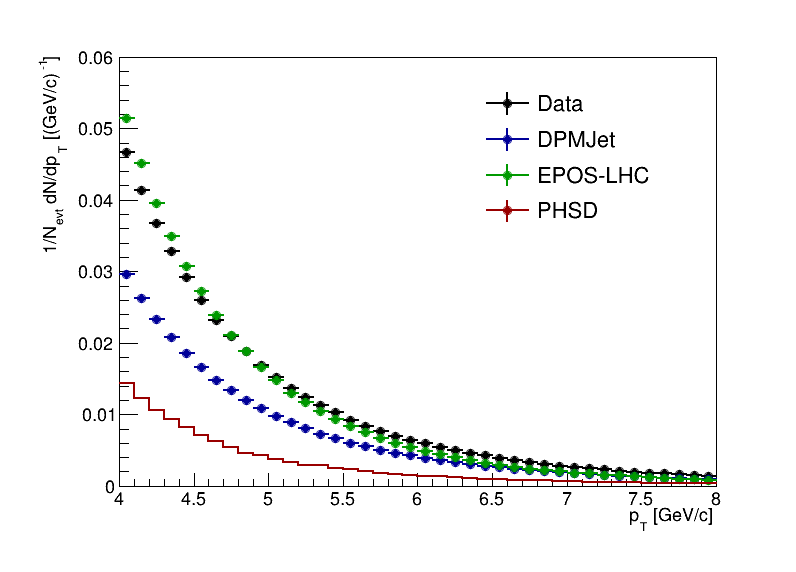

In [7]:
trig_dist_data.SetLineColor(rt.kBlack)
trig_dist_dpmjet.SetLineColor(rt.kBlue + 2)
trig_dist_epos.SetLineColor(rt.kGreen + 2)
trig_dist_phsd.SetLineColor(rt.kRed + 2)

trig_dist_data.SetLineWidth(2)
trig_dist_dpmjet.SetLineWidth(2)
trig_dist_epos.SetLineWidth(2)
trig_dist_phsd.SetLineWidth(2)

trig_dist_data.SetMarkerStyle(20)
trig_dist_dpmjet.SetMarkerStyle(20)
trig_dist_epos.SetMarkerStyle(20)
trig_dist_phsd.SetMarkerStyle(20)

trig_dist_data.SetMarkerSize(1.0)
trig_dist_dpmjet.SetMarkerSize(1.0)
trig_dist_epos.SetMarkerSize(1.0)
trig_dist_phsd.SetMarkerSize(1.0)

trig_dist_data.SetMarkerColor(rt.kBlack)
trig_dist_dpmjet.SetMarkerColor(rt.kBlue + 2)
trig_dist_epos.SetMarkerColor(rt.kGreen + 2)
trig_dist_phsd.SetMarkerColor(rt.kRed + 2)

trig_dist_data.SetTitle(";p_{T} [GeV/c];1/N_{evt} dN/dp_{T} [(GeV/c)^{-1}]")
trig_dist_data.GetYaxis().SetTitleOffset(1.5)
trig_dist_data.GetYaxis().SetRangeUser(0, 0.06)

trig_dist_data.Draw()
trig_dist_dpmjet.Draw("same")
trig_dist_epos.Draw("same")
trig_dist_phsd.Draw("hist same")

leg = rt.TLegend(0.6, 0.6, 0.9, 0.85)
leg.AddEntry(trig_dist_data, "Data", "lep")
leg.AddEntry(trig_dist_dpmjet, "DPMJet", "lep")
leg.AddEntry(trig_dist_epos, "EPOS-LHC", "lep")
leg.AddEntry(trig_dist_phsd, "PHSD", "lep")
leg.SetBorderSize(0)
leg.Draw("same")
c.Draw()


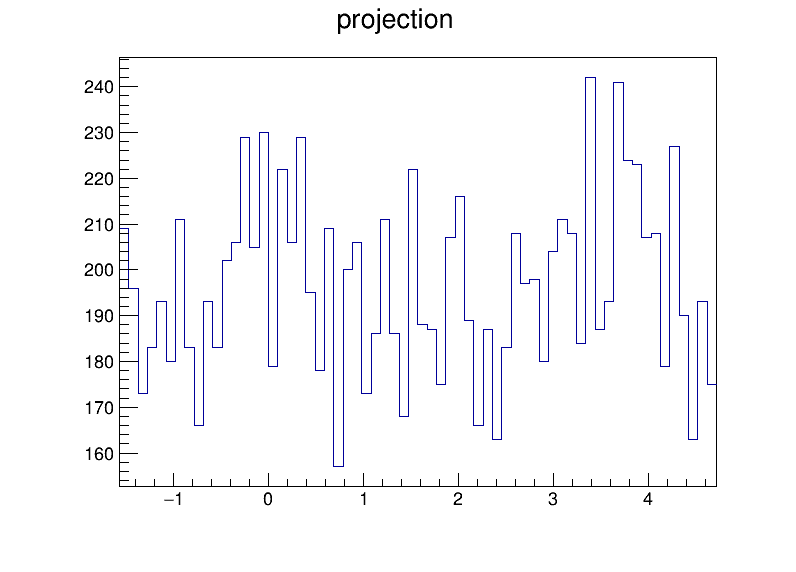

In [8]:
h_h_dist_phsd = phsd_infile.Get("h_h_dist")
h_lambda_dist_phsd = phsd_infile.Get("h_lambda_dist")

h_lambda_dist_phsd.GetAxis(0).SetRangeUser(4, 7.9999)
h_lambda_dist_phsd.GetAxis(1).SetRangeUser(2, 3.9999)
h_lambda_dist_phsd.Projection(2).Draw()
c.Draw()

h_h_dist_phsd.GetAxis(0).SetRangeUser(4, 7.9999)
h_h_dist_phsd.GetAxis(1).SetRangeUser(2, 3.9999)
h_h_dist_phsd.GetAxis(3).SetRangeUser(-1.2, 1.1999)

h_lambda_dist_phsd.GetAxis(0).SetRangeUser(4, 7.9999)
h_lambda_dist_phsd.GetAxis(1).SetRangeUser(1, 3.9999)
h_lambda_dist_phsd.GetAxis(3).SetRangeUser(-1.2, 1.1999)

h_h_2d_phsd = h_h_dist_phsd.Projection(2, 3)
h_lambda_2d_phsd = h_lambda_dist_phsd.Projection(2, 3)
h_h_2d_phsd.Scale(1/n_trigs_phsd)
h_lambda_2d_phsd.Scale(1/n_trigs_phsd)

h_h_2d_phsd.RebinY(4)
h_lambda_2d_phsd.RebinY(4)


In [9]:
h_h_2d_data = data_infile.Get("h_h_2d_mixcor_0_80")
h_h_2d_dpmjet = dpmjet_infile.Get("h_h_2d")
h_h_2d_epos = epos_infile.Get("h_h_2d")

h_lambda_2d_data = data_infile.Get("h_lambda_2d_subtracted_0_80")
h_lambda_2d_dpmjet = dpmjet_infile.Get("h_lambda_2d")
h_lambda_2d_epos = epos_infile.Get("h_lambda_2d")

In [10]:
h_h_2d_data.SetTitle("")
h_h_2d_dpmjet.SetTitle("")
h_h_2d_epos.SetTitle("")
h_h_2d_phsd.SetTitle("")
h_lambda_2d_data.SetTitle("")
h_lambda_2d_dpmjet.SetTitle("")
h_lambda_2d_epos.SetTitle("")
h_lambda_2d_phsd.SetTitle("")

h_h_2d_data.GetXaxis().SetTitle("#Delta#eta")
h_h_2d_data.GetYaxis().SetTitle("#Delta#varphi")
h_h_2d_dpmjet.GetXaxis().SetTitle("#Delta#eta")
h_h_2d_dpmjet.GetYaxis().SetTitle("#Delta#varphi")
h_h_2d_epos.GetXaxis().SetTitle("#Delta#eta")
h_h_2d_epos.GetYaxis().SetTitle("#Delta#varphi")
h_h_2d_phsd.GetXaxis().SetTitle("#Delta#eta")
h_h_2d_phsd.GetYaxis().SetTitle("#Delta#varphi")
h_lambda_2d_data.GetXaxis().SetTitle("#Delta#eta")
h_lambda_2d_data.GetYaxis().SetTitle("#Delta#varphi")
h_lambda_2d_dpmjet.GetXaxis().SetTitle("#Delta#eta")
h_lambda_2d_dpmjet.GetYaxis().SetTitle("#Delta#varphi")
h_lambda_2d_epos.GetXaxis().SetTitle("#Delta#eta")
h_lambda_2d_epos.GetYaxis().SetTitle("#Delta#varphi")
h_lambda_2d_phsd.GetXaxis().SetTitle("#Delta#eta")
h_lambda_2d_phsd.GetYaxis().SetTitle("#Delta#varphi")

h_h_2d_data.GetXaxis().SetTitleSize(0.05)
h_h_2d_data.GetYaxis().SetTitleSize(0.05)
h_h_2d_dpmjet.GetXaxis().SetTitleSize(0.05)
h_h_2d_dpmjet.GetYaxis().SetTitleSize(0.05)
h_h_2d_epos.GetXaxis().SetTitleSize(0.05)
h_h_2d_epos.GetYaxis().SetTitleSize(0.05)
h_h_2d_phsd.GetXaxis().SetTitleSize(0.05)
h_h_2d_phsd.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_data.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_data.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_dpmjet.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_dpmjet.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_epos.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_epos.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_phsd.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_phsd.GetYaxis().SetTitleSize(0.05)

h_h_2d_data.GetXaxis().SetTitleOffset(1.2)
h_h_2d_data.GetYaxis().SetTitleOffset(1.2)
h_h_2d_dpmjet.GetXaxis().SetTitleOffset(1.2)
h_h_2d_dpmjet.GetYaxis().SetTitleOffset(1.2)
h_h_2d_epos.GetXaxis().SetTitleOffset(1.2)
h_h_2d_epos.GetYaxis().SetTitleOffset(1.2)
h_h_2d_phsd.GetXaxis().SetTitleOffset(1.2)
h_h_2d_phsd.GetYaxis().SetTitleOffset(1.2)
h_lambda_2d_data.GetXaxis().SetTitleOffset(1.2)
h_lambda_2d_data.GetYaxis().SetTitleOffset(1.2)
h_lambda_2d_dpmjet.GetXaxis().SetTitleOffset(1.2)
h_lambda_2d_dpmjet.GetYaxis().SetTitleOffset(1.2)
h_lambda_2d_epos.GetXaxis().SetTitleOffset(1.2)
h_lambda_2d_epos.GetYaxis().SetTitleOffset(1.2)
h_lambda_2d_phsd.GetXaxis().SetTitleOffset(1.2)
h_lambda_2d_phsd.GetYaxis().SetTitleOffset(1.2)

Info in <TCanvas::Print>: pdf file figures/h_h_2d_data.pdf has been created


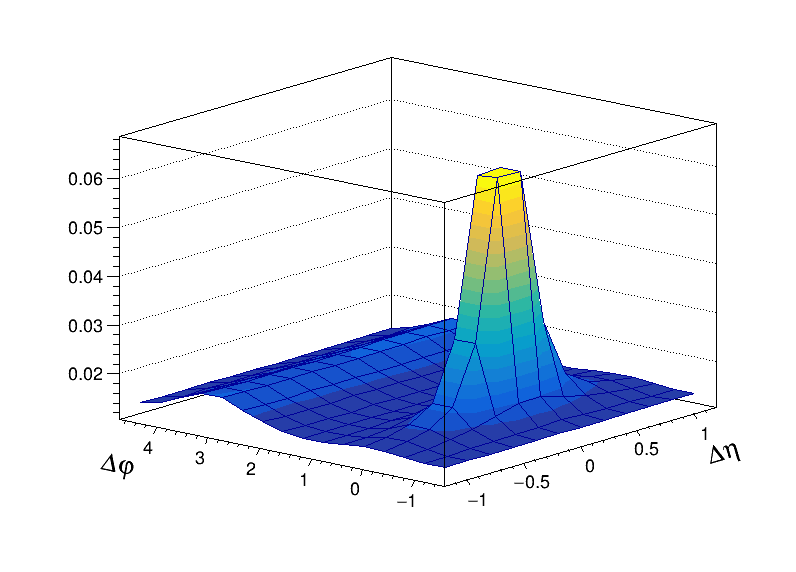

In [11]:
h_h_2d_data.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_data.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_2d_dpmjet.pdf has been created


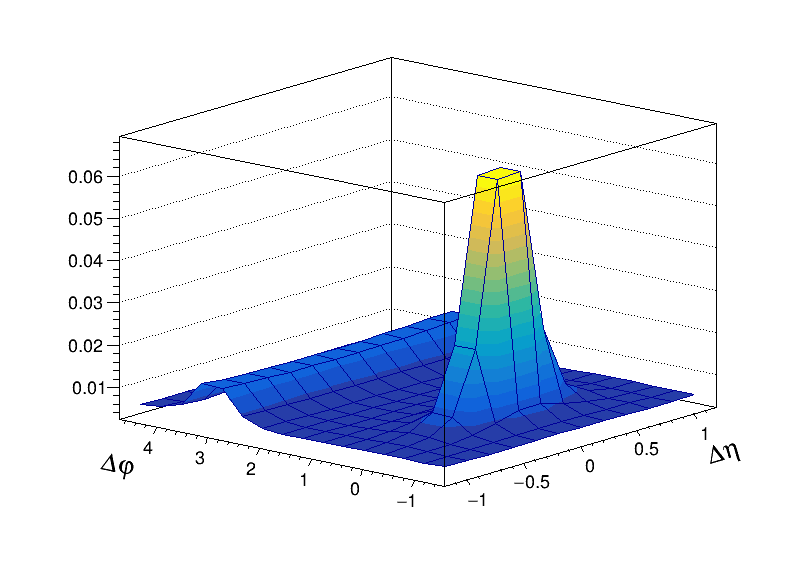

In [12]:
h_h_2d_dpmjet.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_dpmjet.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_2d_epos.pdf has been created


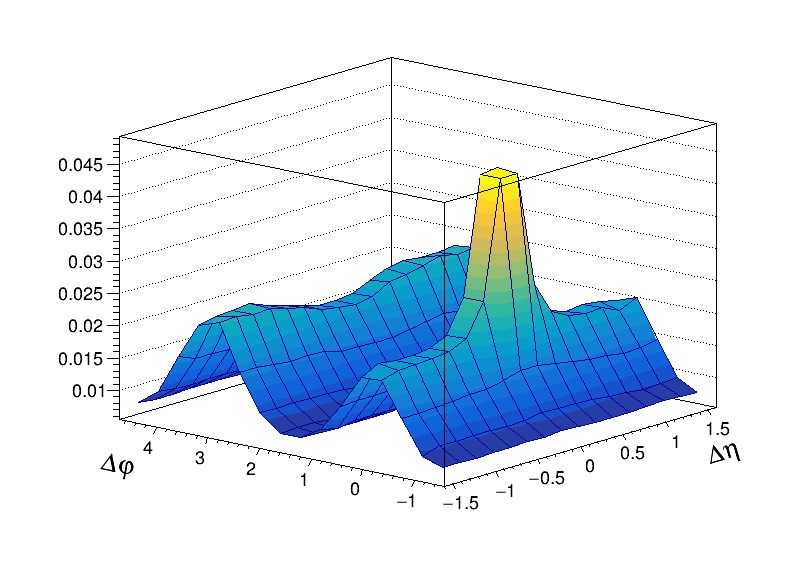

In [13]:
h_h_2d_epos.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_epos.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_2d_phsd.pdf has been created


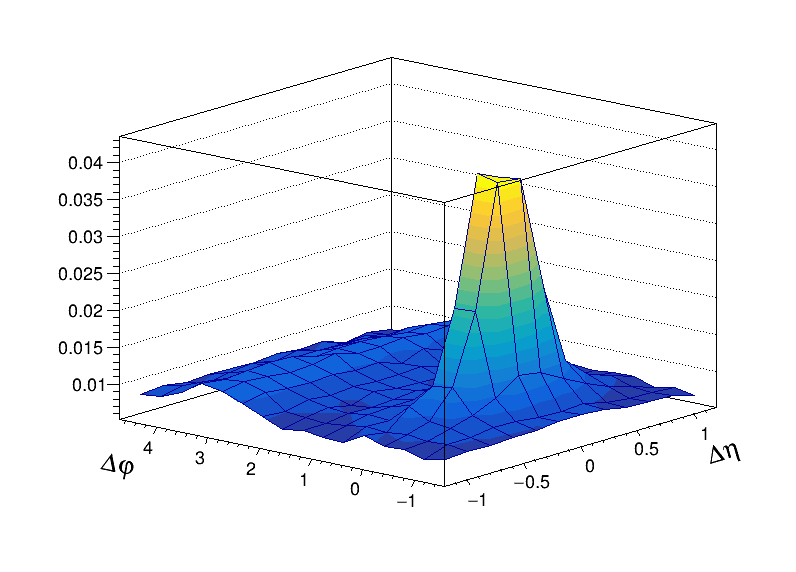

In [14]:
# h_h_2d_phsd.RebinX(4)
# h_h_2d_phsd.RebinY(2)
h_h_2d_phsd.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_phsd.pdf")

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_data.pdf has been created


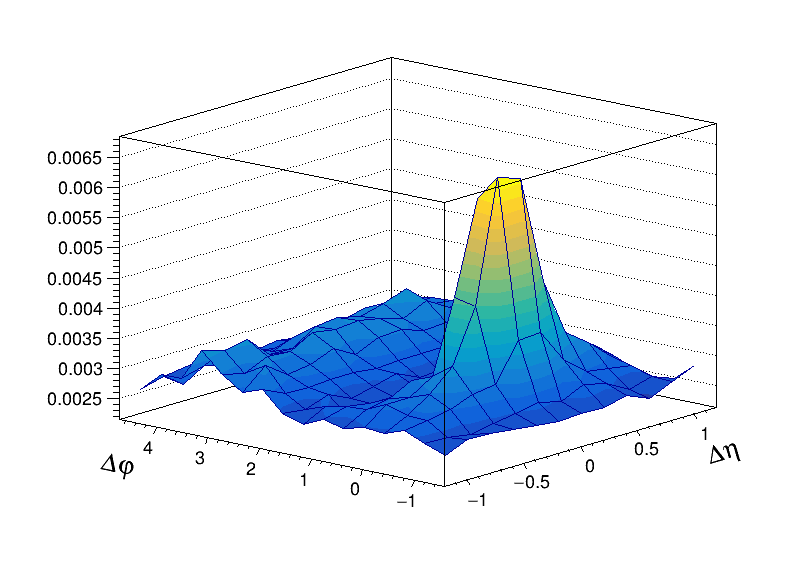

In [15]:
h_lambda_2d_data.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_data.pdf")

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_dpmjet.pdf has been created


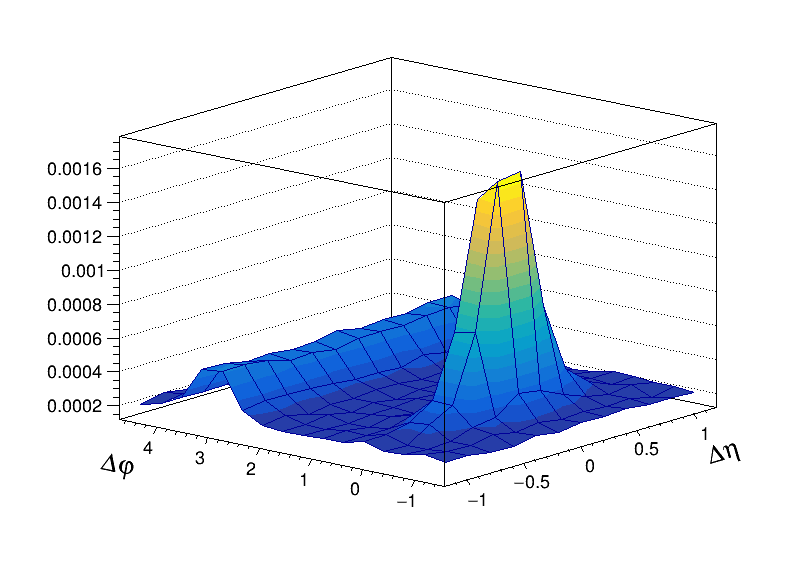

In [16]:
h_lambda_2d_dpmjet.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_dpmjet.pdf")

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_epos.pdf has been created


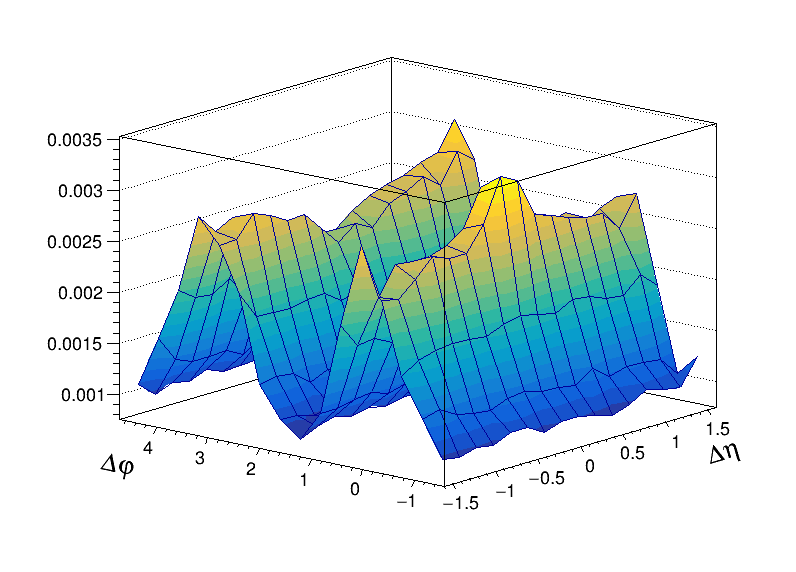

In [17]:
h_lambda_2d_epos.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_epos.pdf")

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_phsd.pdf has been created


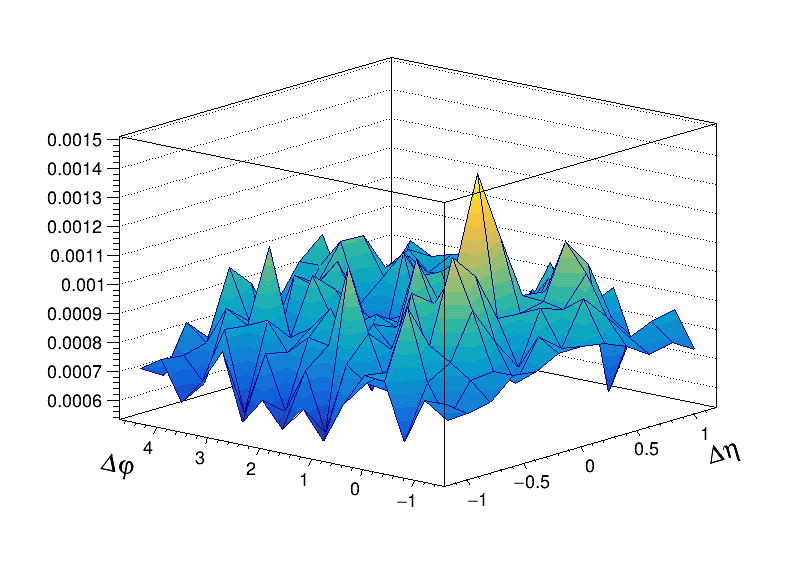

In [18]:
h_lambda_2d_phsd.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_phsd.pdf")

 FCN=1007.96 FROM HESSE     STATUS=NOT POSDEF     16 CALLS         111 TOTAL
                     EDM=1.51685e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.32808e-02   1.65410e-04   5.21305e-05  -1.86030e-03
   2  p1           8.90075e-01   1.10135e-01   7.05631e-05   7.55686e-03
   3  p2           2.84260e-01   3.59058e-02   1.56269e-05   3.41237e-02


Info in <TCanvas::Print>: pdf file figures/epos_v2_fit.pdf has been created


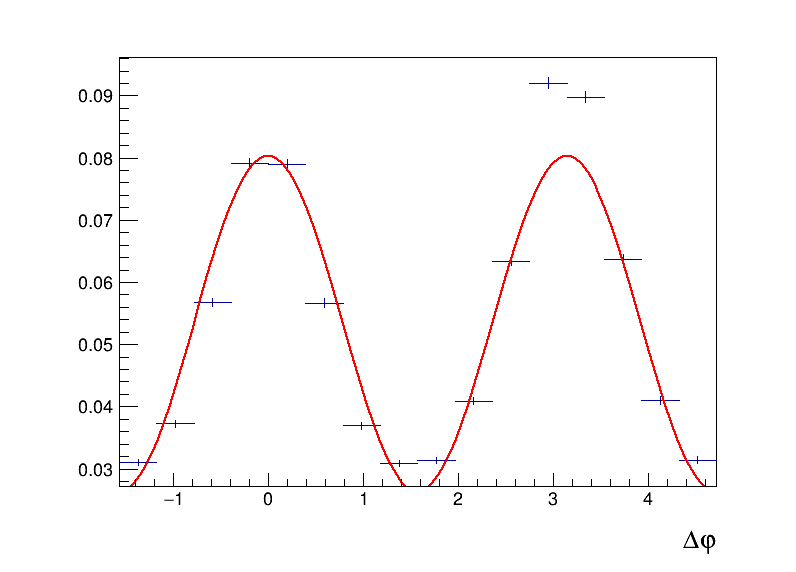

In [39]:
# doing our best to get the v2 baseline for EPOS
h_h_2d_epos.GetXaxis().SetRangeUser(-1.6, -1.20001)
h_h_1d_left_deta = h_h_2d_epos.ProjectionY("h_h_1d_left_deta")
h_h_2d_epos.GetXaxis().SetRangeUser(1.2, 1.5999999)
h_h_1d_right_deta = h_h_2d_epos.ProjectionY("h_h_1d_right_deta")
h_h_1d_large_deta = h_h_1d_left_deta.Clone("h_h_1d_large_deta")
h_h_1d_large_deta.Add(h_h_1d_right_deta)

v2_fit_string = "[0]*(1 + 2*([1]*cos(2*x)))"
v2_fit = rt.TF1("v2_fit", v2_fit_string, -rt.TMath.Pi()/2, 3*rt.TMath.Pi()/2)
v2_fit.SetParameter(0, 0.05)
v2_fit.SetParLimits(0, 0.045, 0.065)

v2_fit.SetParameter(1, 0.05)
v2_fit.SetParLimits(1, 0, 1)
h_h_1d_large_deta.Fit(v2_fit, "R")
h_h_1d_large_deta.Draw()
c.Draw()
c.SaveAs("figures/epos_v2_fit.pdf")

h_h_2d_epos.GetXaxis().SetRangeUser(-1.2, 1.19999)


In [26]:
h_h_1d_data = h_h_2d_data.ProjectionY("h_h_1d_data")
h_h_1d_dpmjet = h_h_2d_dpmjet.ProjectionY("h_h_1d_dpmjet")
h_h_1d_epos = h_h_2d_epos.ProjectionY("h_h_1d_epos")
h_h_1d_phsd = h_h_2d_phsd.ProjectionY("h_h_1d_phsd")
h_lambda_1d_data = h_lambda_2d_data.ProjectionY("h_lambda_1d_data")
h_lambda_1d_dpmjet = h_lambda_2d_dpmjet.ProjectionY("h_lambda_1d_dpmjet")
h_lambda_1d_epos = h_lambda_2d_epos.ProjectionY("h_lambda_1d_epos")
h_lambda_1d_phsd = h_lambda_2d_phsd.ProjectionY("h_lambda_1d_phsd")

In [27]:
h_h_1d_data.SetLineColor(rt.kBlack)
h_h_1d_data.SetLineWidth(2)
h_h_1d_data.SetMarkerColor(rt.kBlack)
h_h_1d_data.SetMarkerStyle(20)
h_h_1d_data.SetMarkerSize(1.5)
h_h_1d_data.GetYaxis().SetRangeUser(0.8*h_h_1d_data.GetMinimum(), 1.3*h_h_1d_data.GetMaximum())
h_h_1d_dpmjet.SetLineColor(rt.kBlue + 2)
h_h_1d_dpmjet.SetLineWidth(2)
h_h_1d_dpmjet.SetMarkerColor(rt.kBlue + 2)
h_h_1d_dpmjet.SetMarkerStyle(20)
h_h_1d_dpmjet.SetMarkerSize(1.5)
h_h_1d_dpmjet.GetYaxis().SetRangeUser(0.8*h_h_1d_dpmjet.GetMinimum(), 1.3*h_h_1d_dpmjet.GetMaximum())
h_h_1d_epos.SetLineColor(rt.kGreen + 2)
h_h_1d_epos.SetLineWidth(2)
h_h_1d_epos.SetMarkerColor(rt.kGreen + 2)
h_h_1d_epos.SetMarkerStyle(20)
h_h_1d_epos.SetMarkerSize(1.5)
h_h_1d_epos.GetYaxis().SetRangeUser(0.8*h_h_1d_epos.GetMinimum(), 1.3*h_h_1d_epos.GetMaximum())
h_h_1d_phsd.SetLineColor(rt.kRed + 2)
h_h_1d_phsd.SetLineWidth(2)
h_h_1d_phsd.SetMarkerColor(rt.kRed + 2)
h_h_1d_phsd.SetMarkerStyle(20)
h_h_1d_phsd.SetMarkerSize(1.5)
h_h_1d_phsd.GetYaxis().SetRangeUser(0.8*h_h_1d_phsd.GetMinimum(), 1.3*h_h_1d_phsd.GetMaximum())

In [36]:
# legend_1d = rt.TLegend(0.75, 0.75, 0.9, 0.87)
legend_1d = rt.TLegend(0.65, 0.75, 0.9, 0.87)
# legend_1d.AddEntry(h_h_1d_data, "Data")
# legend_1d.AddEntry(h_h_1d_dpmjet, "DPMJet")
legend_1d.AddEntry(h_h_1d_epos, "EPOS-LHC (before sub)")
# legend_1d.AddEntry(h_h_1d_phsd, "PHSD")
legend_1d.SetBorderSize(0)
legend_1d.SetFillStyle(0)

In [43]:
# v2_fit_scale = 2.4/0.8
# v2_fit.SetParameter(0, v2_fit.GetParameter(0)*v2_fit_scale)
h_h_1d_epos_subtracted = h_h_1d_epos.Clone("h_h_1d_epos_subtracted")
h_h_1d_epos_subtracted.Add(v2_fit, -1)
h_h_1d_epos_subtracted.SetLineColor(rt.kMagenta + 2)
h_h_1d_epos_subtracted.SetMarkerColor(rt.kMagenta + 2)
legend_1d.AddEntry(h_h_1d_epos_subtracted, "EPOS-LHC (after sub)")

Info in <TCanvas::Print>: pdf file figures/h_h_1d_model_comp.pdf has been created


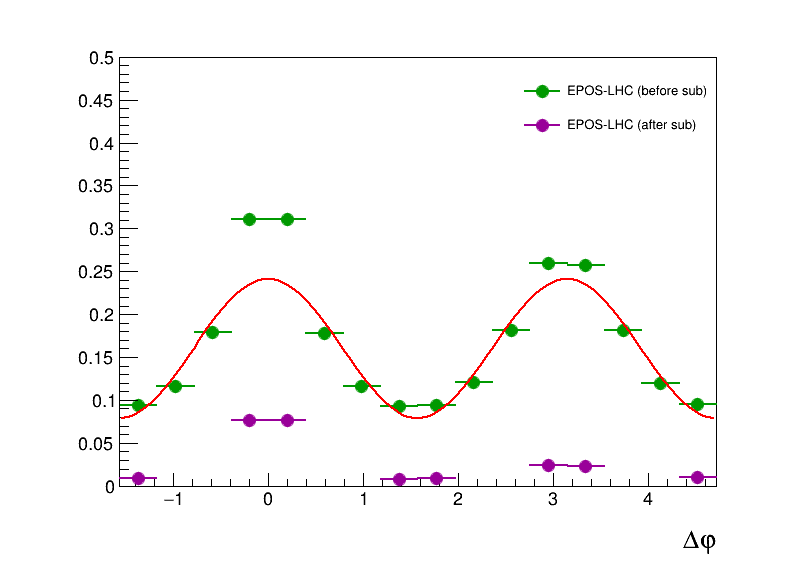

In [45]:
h_h_1d_epos.GetYaxis().SetRangeUser(0, 0.5)
# h_h_1d_data.Draw()
h_h_1d_epos.Draw()
h_h_1d_epos_subtracted.Draw("SAME")
v2_fit.Draw("SAME")
# h_h_1d_dpmjet.Draw("SAME")
# h_h_1d_phsd.Draw("SAME")
legend_1d.Draw("SAME")

c.Draw()
c.SaveAs("figures/h_h_1d_model_comp.pdf")

In [212]:
h_lambda_1d_data.SetLineColor(rt.kBlack)
h_lambda_1d_data.SetLineWidth(2)
h_lambda_1d_data.SetMarkerColor(rt.kBlack)
h_lambda_1d_data.SetMarkerStyle(21)
h_lambda_1d_data.SetMarkerSize(1.5)
h_lambda_1d_data.GetYaxis().SetRangeUser(0.8*h_lambda_1d_data.GetMinimum(), 1.3*h_lambda_1d_data.GetMaximum())
h_lambda_1d_dpmjet.SetLineColor(rt.kBlue + 2)
h_lambda_1d_dpmjet.SetLineWidth(2)
h_lambda_1d_dpmjet.SetMarkerColor(rt.kBlue + 2)
h_lambda_1d_dpmjet.SetMarkerStyle(21)
h_lambda_1d_dpmjet.SetMarkerSize(1.5)
h_lambda_1d_dpmjet.GetYaxis().SetRangeUser(0.8*h_lambda_1d_dpmjet.GetMinimum(), 1.3*h_lambda_1d_epos.GetMaximum())

h_lambda_1d_epos.SetLineColor(rt.kGreen + 2)
h_lambda_1d_epos.SetLineWidth(2)
h_lambda_1d_epos.SetMarkerColor(rt.kGreen + 2)
h_lambda_1d_epos.SetMarkerStyle(21)
h_lambda_1d_epos.SetMarkerSize(1.5)
h_lambda_1d_epos.GetYaxis().SetRangeUser(0.8*h_lambda_1d_epos.GetMinimum(), 1.3*h_lambda_1d_epos.GetMaximum())
h_lambda_1d_phsd.SetLineColor(rt.kRed + 2)
h_lambda_1d_phsd.SetLineWidth(2)
h_lambda_1d_phsd.SetMarkerColor(rt.kRed + 2)
h_lambda_1d_phsd.SetMarkerStyle(21)
h_lambda_1d_phsd.SetMarkerSize(1.5)
h_lambda_1d_phsd.GetYaxis().SetRangeUser(0.8*h_lambda_1d_phsd.GetMinimum(), 1.3*h_lambda_1d_phsd.GetMaximum())

In [213]:
legend_1d = rt.TLegend(0.75, 0.75, 0.9, 0.87)
legend_1d.AddEntry(h_lambda_1d_data, "Data")
legend_1d.AddEntry(h_lambda_1d_dpmjet, "DPMJet")
legend_1d.AddEntry(h_lambda_1d_epos, "EPOS")
legend_1d.AddEntry(h_lambda_1d_phsd, "PHSD")
legend_1d.SetBorderSize(0)
legend_1d.SetFillStyle(0)

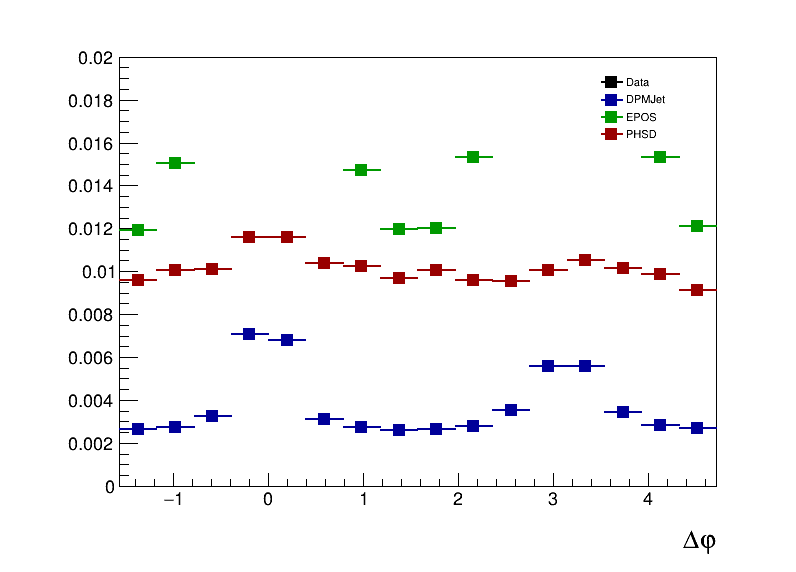

In [215]:
h_lambda_1d_data.GetYaxis().SetRangeUser(0, 0.02)
h_lambda_1d_data.Draw()
h_lambda_1d_phsd.Draw("SAME")
h_lambda_1d_epos.Draw("SAME")
h_lambda_1d_dpmjet.Draw("SAME")
legend_1d.Draw("SAME")
c.Draw()
# c.SaveAs("figures/h_lambda_1d_model_comp.pdf")

Warning in <TFile::Append>: Replacing existing TH1: lambda_dist_proj_2 (Potential memory leak).


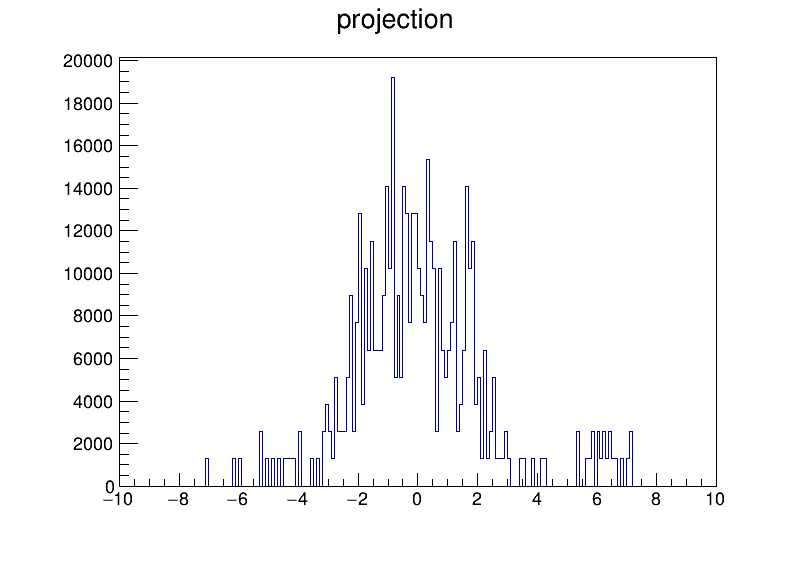

In [38]:
lambda_dist_phsd = phsd_infile.Get("lambda_dist")
lambda_dist_phsd.GetAxis(0).SetRangeUser(2, 3.9999)
lambda_dist_phsd.Projection(2).Draw()
c.Draw()